In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data.shape

(42000, 785)

In [101]:
data = np.array(data)
data.shape

(42000, 785)

In [103]:
# split the data
np.random.shuffle(data)

m, n = data.shape

X, y = data[:, 1:], data[:, 0]

X_hold = X[:1000].T
X_hold = X_hold / 255.
y_hold = y[:1000]

X_train = X[1000:].T
X_train = X_train / 255.
y_train = y[1000:]

X_train.shape, y_train.shape, X_hold.shape, y_hold.shape

((784, 41000), (41000,), (784, 1000), (1000,))

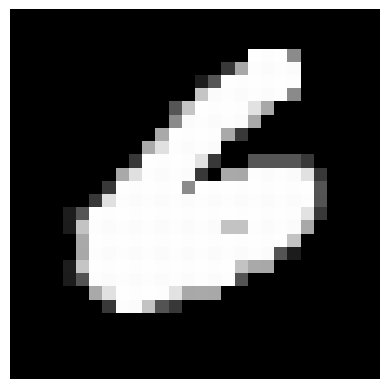

In [104]:
plt.axis("off")
plt.imshow(X_train[:, 0].reshape((28, 28)), cmap="gray");

In [115]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5

  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

def onehot(y):
  Y = np.zeros((y.size, y.max() + 1))
  Y[np.arange(y.size), y] = 1

  return Y.T

def derivative_relu(Z):
  return Z > 0

def backprop(Z1, A1, Z2, A2, W2, X, y):
  Y = onehot(y)

  dZ2 = A2 - Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * derivative_relu(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)

  return dW1, db1, dW2, db2

def apply_gradient(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha=0.1):
  W1 -= alpha * dW1
  b1 -= alpha * db1
  W2 -= alpha * dW2
  b2 -= alpha * db2

  return W1, b1, W2, b2

def pred(A2):
  return np.argmax(A2, 0)

def accuracy(pred, y):
  return np.sum(pred == y) / y.size

def gradient_descent(X, y, iters=500):
  W1, b1, W2, b2 = init_params()

  for i in range(iters):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W2, X, y)
    W1, b1, W2, b2 = apply_gradient(W1, b1, W2, b2, dW1, db1, dW2, db2)

    if i % 10 == 0:
      prediction = pred(A2)
      print(f"Iteration {i} Accuracy: {accuracy(prediction, y)}")

  return W1, b1, W2, b2

In [119]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train)

Iteration 0 Accuracy: 0.11768292682926829
Iteration 10 Accuracy: 0.2245609756097561
Iteration 20 Accuracy: 0.2692439024390244
Iteration 30 Accuracy: 0.3223170731707317
Iteration 40 Accuracy: 0.3722682926829268
Iteration 50 Accuracy: 0.42329268292682926
Iteration 60 Accuracy: 0.46904878048780485
Iteration 70 Accuracy: 0.5079512195121951
Iteration 80 Accuracy: 0.537
Iteration 90 Accuracy: 0.5609024390243903
Iteration 100 Accuracy: 0.5835121951219512
Iteration 110 Accuracy: 0.6019024390243902
Iteration 120 Accuracy: 0.6178536585365854
Iteration 130 Accuracy: 0.6331219512195122
Iteration 140 Accuracy: 0.6478780487804878
Iteration 150 Accuracy: 0.6608536585365854
Iteration 160 Accuracy: 0.673219512195122
Iteration 170 Accuracy: 0.6862682926829269
Iteration 180 Accuracy: 0.6973170731707317
Iteration 190 Accuracy: 0.7064146341463414
Iteration 200 Accuracy: 0.7162195121951219
Iteration 210 Accuracy: 0.7251219512195122
Iteration 220 Accuracy: 0.7329756097560975
Iteration 230 Accuracy: 0.7399756

In [121]:
_, _, _, A2 = forward_prop(W1, b1, W2, b2, X_hold)

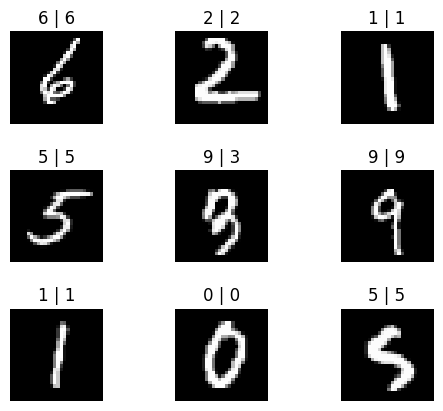

In [129]:
y_pred = pred(A2)

fig, axs = plt.subplots(3,3)
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(9):
  axs[i].set_title(f"{y_pred[i]} | {y_hold[i]}")
  axs[i].axis("off")
  axs[i].imshow(X_hold[:, i].reshape(28, 28), cmap="gray")